# Метод Галеркина

In [1]:
from scipy.integrate import quad
import numpy as np
import sympy as sp
import math

In [2]:
x_vals = np.linspace(0, 1, 100)
N = 4 # Кол-во базисных функций

In [3]:
def basis(i, x):
    return x * (1 - x) ** i

def basis_derivative(i, x):
    return (1 - x) ** i - i * x * (1 - x) ** (i - 1)

def a_ij(i, j):
    integrand = lambda x: basis_derivative(i, x) * basis_derivative(j, x) + basis(i, x) * basis(j, x)
    return quad(integrand, 0, 1)[0]

def b_i(i):
    integrand = lambda x: 2.5 * x * basis(i, x)
    return quad(integrand, 0, 1)[0]

A = np.array([[a_ij(i, j) for j in range(N)] for i in range(N)])
B = np.array([b_i(i) for i in range(N)])

print(A, B)

coeffs = np.linalg.solve(A, B)
print(coeffs)

[[1.33333333 0.08333333 0.03333333 0.01666667]
 [0.08333333 0.36666667 0.18333333 0.10952381]
 [0.03333333 0.18333333 0.14285714 0.10595238]
 [0.01666667 0.10952381 0.10595238 0.08968254]] [0.83333333 0.20833333 0.08333333 0.04166667]
[ 0.59601466  0.59487939 -0.34561898  0.03566788]


In [4]:
def approximated_solution(x):
    return sum(coeffs[i] * basis(i, x) for i in range(N))
solution = (np.sin(x_vals) / np.cos(1)) - x_vals

print(approximated_solution)

<function approximated_solution at 0x77529c239f80>


In [5]:
import matplotlib.pyplot as plot

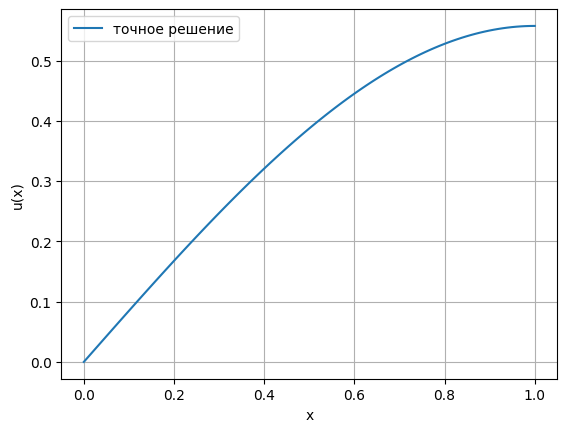

In [6]:
plot.plot(x_vals, solution, label='точное решение')
plot.xlabel("x")
plot.ylabel("u(x)")
plot.legend()
plot.grid()
plot.show()
plot.show()

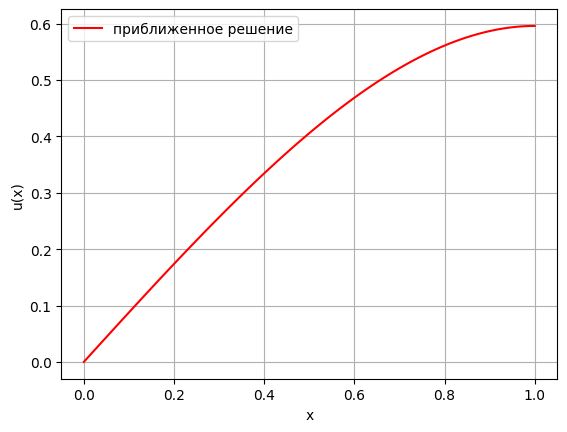

In [7]:
approximated_y = np.array([approximated_solution(x) for x in x_vals])
plot.plot(x_vals, approximated_y, 'r', label='приближенное решение')
plot.xlabel("x")
plot.ylabel("u(x)")
plot.legend()
plot.grid()
plot.show()

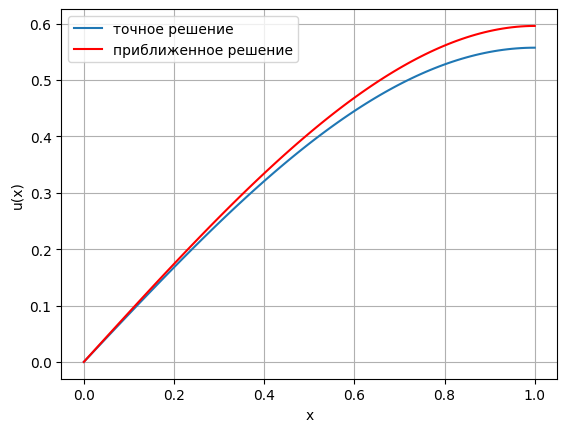

In [8]:
plot.plot(x_vals, solution, label='точное решение')
plot.plot(x_vals, approximated_y, 'r', label='приближенное решение')
plot.xlabel("x")
plot.ylabel("u(x)")
plot.legend()
plot.grid()
plot.show()